In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('display.width', 2000)
nucleus_df = pd.read_csv('csv/nuclei_mouzuna_2.csv')


In [5]:
cdFluo_df = nucleus_df[(nucleus_df['CellType'] == 'Neuron')]
dg_df = cdFluo_df[(nucleus_df['Location'] == 'DG')]
print(dg_df)

       Condition                      ImageName  Label    Area                                           Centroid CellType Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  gfpPositive
18          P2WT  P2 WT 2063 (45) brain1 S1.lsm     19  1859.0  (6.522861753630984, 1664.302313071544, 1395.80...   Neuron       DG     28.515869     65.543841     42.701452    136.133405          NaN
21          P2WT  P2 WT 2063 (45) brain1 S1.lsm     22  1901.0  (5.07101525512888, 2697.027354024198, 348.1962...   Neuron       DG      4.580221     43.339295     55.110468    201.270910          NaN
51          P2WT  P2 WT 2063 (45) brain1 S1.lsm     52  3159.0  (7.203545425767648, 1420.0069642291865, 1359.5...   Neuron       DG     12.285850     59.197847     47.964862    170.596075          NaN
67          P2WT  P2 WT 2063 (45) brain1 S1.lsm     68  1367.0  (7.461594732991953, 1544.581565471836, 1450.87...   Neuron       DG     13.204828     75.734455     45.130944    165.899781         

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_11512\3396076130.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dg_df = cdFluo_df[(nucleus_df['Location'] == 'DG')]


In [12]:
mean_ch3_intensity = dg_df.groupby(['Condition', 'ImageName'])['Ch3Intensity'].mean().reset_index()
mean_ch3_intensity['Age'] = mean_ch3_intensity['Condition'].apply(lambda x: x[:2])
mean_ch3_intensity['Condition'] = mean_ch3_intensity['Condition'].apply(lambda x: x[-2:])

print(mean_ch3_intensity)

   Condition                      ImageName  Ch3Intensity Age
0         N3  P2 N3 2063 (55) brain1 S1.lsm     97.320539  P2
1         N3  P2 N3 2063 (55) brain1 S2.lsm     78.206457  P2
2         N3  P2 N3 2063 (55) brain2 S1.lsm     95.144999  P2
3         N3  P2 N3 2063 (55) brain2 S2.lsm     84.899657  P2
4         N3  P2 N3 2063 (56) brain1 S1.lsm     73.451764  P2
5         N3  P2 N3 2063 (56) brain1 S2.lsm     75.454961  P2
6         N3  P2 N3 2063 (56) brain2 S2.lsm     98.304627  P2
7         N3  P2 N3 2063 (57) brain1 S1.lsm     94.832868  P2
8         N3  P2 N3 2063 (57) brain1 S2.lsm     78.414405  P2
9         N3  P2 N3 2063 (57) brain2 S1.lsm     97.147988  P2
10        N3  P2 N3 2063 (57) brain2 S2.lsm     99.698791  P2
11        WT  P2 WT 2063 (45) brain1 S1.lsm     50.628082  P2
12        WT  P2 WT 2063 (45) brain1 S2.lsm     57.505387  P2
13        WT  P2 WT 2063 (45) brain2 S1.lsm     58.743892  P2
14        WT  P2 WT 2063 (45) brain2 S2.lsm     62.989604  P2
15      

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


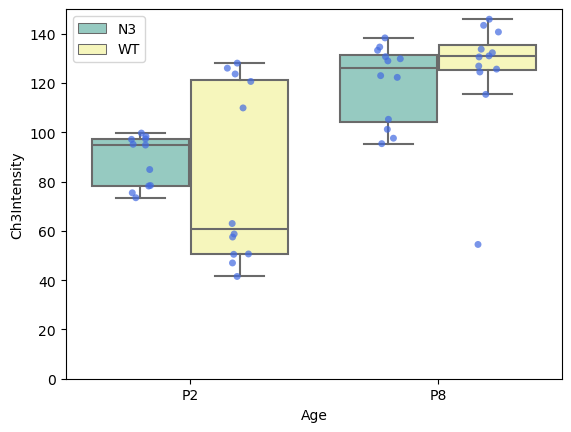

In [27]:
palette = sns.color_palette(['royalblue'], 2)
plt.ylim(0,150)
boxplot = sns.boxplot(data=mean_ch3_intensity, x ='Age', y='Ch3Intensity', hue='Condition', showfliers=False,palette='Set3')
sns.stripplot(data=mean_ch3_intensity, x ='Age', y='Ch3Intensity', hue='Condition', palette=palette, dodge=True, alpha=0.7)
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=labels[:2])
plt.savefig('plots/neunIntensityTDG.pdf')
plt.show()
